In [17]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

df = pd.read_csv("/Users/wenqing_liu/Desktop/第三学期/Regression method/data.csv")
n = len(df)
df1 = df.drop(df.columns[[1, 3]], axis=1)
df2 = df.drop(df.columns[[0, 2]], axis=1)
df2.iloc[:, 0] = df2.iloc[:, 1] - df2.iloc[:, 0]
new_columns = ["y", "m", "person", "coin", "group"]
df1.columns = df2.columns = new_columns
df_combined = pd.concat([df1, df2], ignore_index=True)
df_combined['person'] = pd.Categorical(df_combined['person'])
df_combined['coin'] = pd.Categorical(df_combined['coin'])
df_combined['group'] = pd.Categorical(df_combined['group'])
df_combined["total"]=df_combined["m"]
y = np.column_stack([df_combined['y'], df_combined['m'] - df_combined['y']]).astype(float)
X = sm.add_constant(np.ones(len(df_combined))).astype(float)
model = sm.GLM(y, X, family=sm.families.Binomial())
results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           ['y1', 'y2']   No. Observations:                  422
Model:                            GLM   Df Residuals:                      421
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1797.0
Date:                Fri, 03 Jan 2025   Deviance:                       686.86
Time:                        21:56:19   Pearson chi2:                     685.
No. Iterations:                     3   Pseudo R-squ. (CS):         -2.112e-13
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0308      0.003      9.119      0.0

In [19]:
df

,heads→heads,tails→heads,N_start_heads_up,N_start_tails_up,person,coin,group
0,244,240,485,515,frantisekB,20DEM-silver,top-up
1,260,245,505,495,frantisekB,1CZK,top-up
2,209,260,469,531,frantisekB,5CZK,top-up
3,530,495,1021,979,frantisekB,0.25USD,top-up
4,533,507,1039,961,frantisekB,10CZK,top-up
...,...,...,...,...,...,...,...
206,517,561,1084,1116,FrederikAust,0.50EUR,internet
207,782,844,1626,1674,FrederikAust,2EUR,internet
208,233,249,478,522,FrederikAust,1EUR,internet
209,775,746,1523,1477,FrederikAust,0.20EUR,internet


In [266]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from statsmodels.formula.api import mixedlm

# 读取数据
df = pd.read_csv("/Users/wenqing_liu/Desktop/第三学期/Regression method/data.csv")
n = len(df)
df1 = df.drop(df.columns[[1, 3]], axis=1)
df2 = df.drop(df.columns[[0, 2]], axis=1)
df2.iloc[:, 0] = df2.iloc[:, 1] - df2.iloc[:, 0]

# 重命名列
new_columns = ["y", "m", "person", "coin", "group"]
df1.columns = df2.columns = new_columns

# 合并数据框
df_combined = pd.concat([df1, df2], ignore_index=True)

# 将分类变量转换为类别
df_combined['person'] = pd.Categorical(df_combined['person'])
df_combined['coin'] = pd.Categorical(df_combined['coin'])
df_combined['group'] = pd.Categorical(df_combined['group'])
df_combined["total"] = df_combined["m"]

# 计算 y 的 log-odds 转换
df_combined['log_odds'] = np.log(df_combined['y'] / (df_combined['m'] - df_combined['y']))

print("hello")
model = mixedlm("log_odds ~ 1", df_combined, groups=df_combined["person"], re_formula="~1 + C(coin)")
results = model.fit()

# 输出模型结果，查看方差成分
print(results.summary())

hello


KeyboardInterrupt: 

: 

In [261]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from statsmodels.formula.api import mixedlm

# 读取数据
df = pd.read_csv("/Users/wenqing_liu/Desktop/第三学期/Regression method/data.csv")

# 数据预处理
n = len(df)
df1 = df.drop(df.columns[[1, 3]], axis=1)
df2 = df.drop(df.columns[[0, 2]], axis=1)
df2.iloc[:, 0] = df2.iloc[:, 1] - df2.iloc[:, 0]

# 重命名列
new_columns = ["y", "m", "person", "coin", "group"]
df1.columns = df2.columns = new_columns

# 合并数据框
df_combined = pd.concat([df1, df2], ignore_index=True)

# 将分类变量转换为类别
df_combined['person'] = pd.Categorical(df_combined['person'])
df_combined['coin'] = pd.Categorical(df_combined['coin'])
df_combined['group'] = pd.Categorical(df_combined['group'])

# 创建因变量 y 和自变量 X
df_combined["total"] = df_combined["m"]
y = np.column_stack([df_combined['y'], df_combined['m'] - df_combined['y']]).astype(float)

model = mixedlm("y ~ 1", df_combined, groups=df_combined["coin"], re_formula="~1 + C(person)")

# 拟合模型
results = model.fit()

# 输出模型结果
print(results.summary())


/Users/wenqing_liu/ENTER/envs/pymc_env/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/Users/wenqing_liu/ENTER/envs/pymc_env/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/Users/wenqing_liu/ENTER/envs/pymc_env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenqing_liu/ENTER/envs/pymc_env/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/wenqing_liu/ENTER/envs/pymc_env/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
 

LinAlgError: Singular matrix

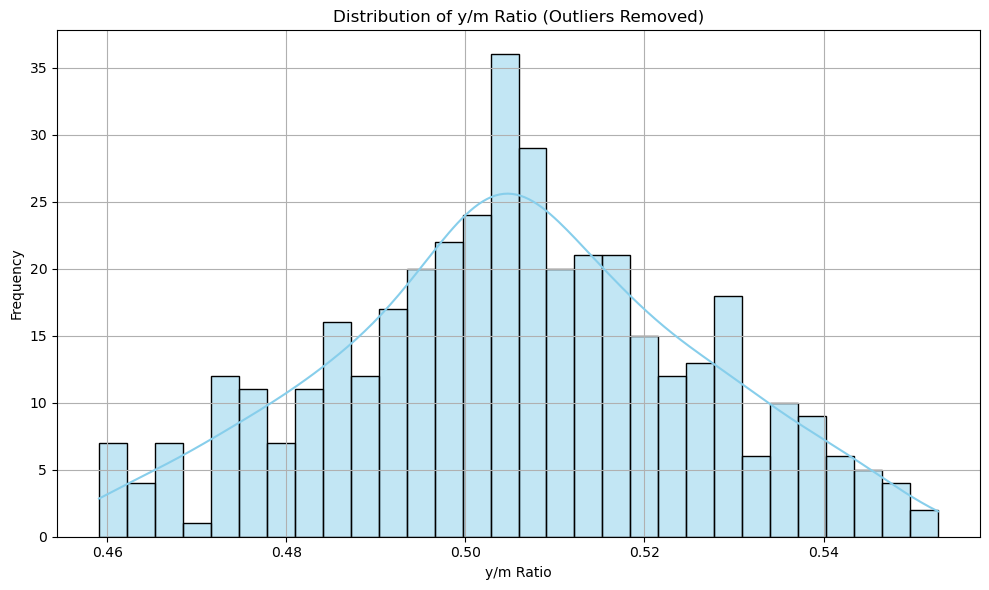

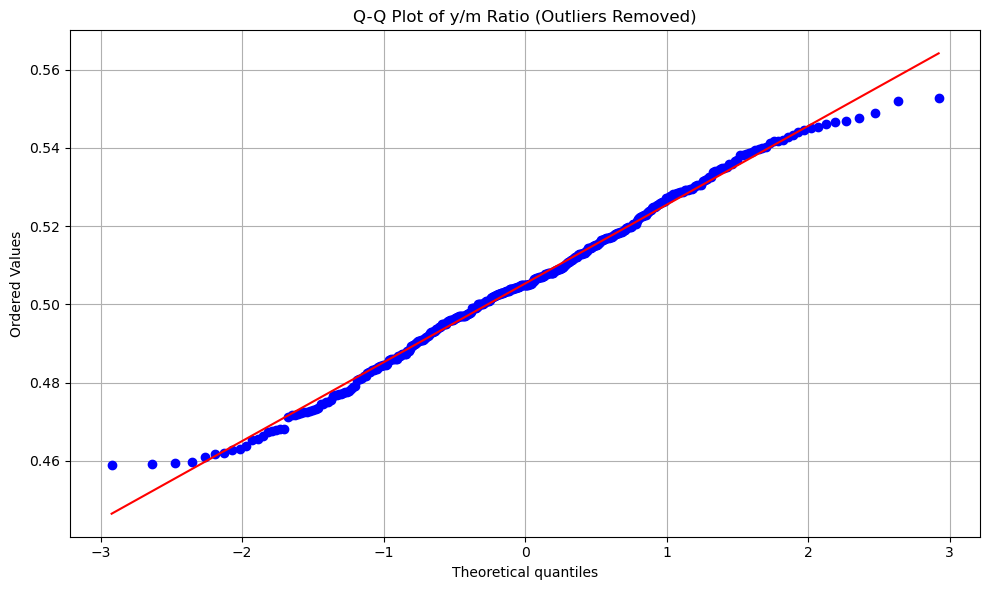

Shapiro-Wilk Test Statistic (Filtered): 0.9925935130172029, p-value (Filtered): 0.04607377845159204
The filtered data does not follow a normal distribution (reject H0).


In [242]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 计算 y/m 比例
y_m_ratio = df_combined['y'] / df_combined['m']

# 计算 IQR
Q1 = np.percentile(y_m_ratio, 25)
Q3 = np.percentile(y_m_ratio, 75)
IQR = Q3 - Q1

# 定义离群点的边界
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 去掉离群点
y_m_ratio_filtered = y_m_ratio[(y_m_ratio >= lower_bound) & (y_m_ratio <= upper_bound)]

# 绘制去掉离群点后的 y/m 的分布
plt.figure(figsize=(10, 6))
sns.histplot(y_m_ratio_filtered, bins=30, kde=True, color='skyblue')
plt.title('Distribution of y/m Ratio (Outliers Removed)')
plt.xlabel('y/m Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Q-Q Plot for filtered data
plt.figure(figsize=(10, 6))
stats.probplot(y_m_ratio_filtered, dist="norm", plot=plt)
plt.title('Q-Q Plot of y/m Ratio (Outliers Removed)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Shapiro-Wilk test for normality on filtered data
shapiro_stat, shapiro_p = stats.shapiro(y_m_ratio_filtered)
print(f'Shapiro-Wilk Test Statistic (Filtered): {shapiro_stat}, p-value (Filtered): {shapiro_p}')

# Interpret the p-value
alpha = 0.05
if shapiro_p > alpha:
    print("The filtered data follows a normal distribution (fail to reject H0).")
else:
    print("The filtered data does not follow a normal distribution (reject H0).")

In [108]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from scipy.stats import chi2

# 读取数据
df = pd.read_csv("/Users/wenqing_liu/Desktop/第三学期/Regression method/data.csv")
n = len(df)

# 预处理数据
df1 = df.drop(df.columns[[1, 3]], axis=1)
df2 = df.drop(df.columns[[0, 2]], axis=1)
df2.iloc[:, 0] = df2.iloc[:, 1] - df2.iloc[:, 0]

new_columns = ["y", "m", "person", "coin", "group"]
df1.columns = df2.columns = new_columns

# 合并数据
df_combined = pd.concat([df1, df2], ignore_index=True)
df_combined['person'] = pd.Categorical(df_combined['person'])
df_combined['coin'] = pd.Categorical(df_combined['coin'])
df_combined['group'] = pd.Categorical(df_combined['group'])
df_combined["total"] = df_combined["m"]
bins = [-float('inf'), 100, 500, 1000, 2000, 5000, float('inf')]
labels = ['<100', '100-500', '500-1000', '1000-2000', '2000-5000', '>5000']

# 创建新列 'total_category' 表示类别
df_combined['total_category'] = pd.cut(df_combined['total'], bins=bins, labels=labels)
df_combined['total_category'] = pd.Categorical(df_combined['total_category'])

# 准备y和X
y = np.column_stack([df_combined['y'], df_combined['m'] - df_combined['y']]).astype(float)
X = sm.add_constant(np.ones(len(df_combined))).astype(float)

# 拟合基础模型（仅常数项）
model_base = sm.GLM(y, X, family=sm.families.Binomial())
results_base = model_base.fit()

# 加入 person 特征
X_person = sm.add_constant(pd.get_dummies(df_combined['person'], drop_first=False).astype(float))
model_person = sm.GLM(y, X_person, family=sm.families.Binomial())
results_person = model_person.fit()

# 加入 group 特征
X_group = sm.add_constant(pd.get_dummies(df_combined['group'], drop_first=False).astype(float))
model_group = sm.GLM(y, X_group, family=sm.families.Binomial())
results_group = model_group.fit()

# 加入 coin 特征
X_coin = sm.add_constant(pd.get_dummies(df_combined['coin'], drop_first=False).astype(float))
model_coin = sm.GLM(y, X_coin, family=sm.families.Binomial())
results_coin = model_coin.fit()


# # 使用连续值 'total' 作为自变量
# X_total = sm.add_constant(df_combined['total'].astype(float))
# model_total = sm.GLM(y, X_total, family=sm.families.Binomial())
# results_total = model_total.fit()
# 使用连续值 'total' 作为自变量
X_total = sm.add_constant(pd.get_dummies(df_combined['total_category'], drop_first=False).astype(float))
model_total = sm.GLM(y, X_total, family=sm.families.Binomial())
results_total = model_total.fit()

# 打印模型的摘要
print("基础模型摘要:")
print(results_base.summary())
print("\n加入 'person' 特征的模型摘要:")
print(results_person.summary())
print("\n加入 'group' 特征的模型摘要:")
print(results_group.summary())
print("\n加入 'coin' 特征的模型摘要:")
print(results_coin.summary())
print("\n加入 'total' 特征的模型摘要:")
print(results_total.summary())

ll_base = results_base.llf
ll_person = results_person.llf
ll_group = results_group.llf
ll_coin = results_coin.llf
ll_total = results_total.llf
# 计算自由度差异
df_person = results_person.df_model - results_base.df_model
df_group = results_group.df_model - results_base.df_model
df_coin = results_coin.df_model - results_base.df_model
df_total = results_total.df_model - results_base.df_model
# 计算似然比
lr_person = 2 * (ll_person - ll_base)
lr_group = 2 * (ll_group - ll_base)
lr_coin = 2 * (ll_coin - ll_base)
lr_total = 2 * (ll_total - ll_base)
# 计算 p-value（卡方检验）
p_value_person = chi2.sf(lr_person, df_person)
p_value_group = chi2.sf(lr_group, df_group)
p_value_coin = chi2.sf(lr_coin, df_coin)
p_value_total = chi2.sf(lr_total, df_total)
# 打印似然比检验结果
print("\n似然比检验结果：")
print(f"person 模型 vs 基础模型 LRT p-value: {p_value_person}")
print(f"group 模型 vs 基础模型 LRT p-value: {p_value_group}")
print(f"coin 模型 vs 基础模型 LRT p-value: {p_value_coin}")
print(f"total 模型 vs 基础模型 LRT p-value: {p_value_total}")


基础模型摘要:
                 Generalized Linear Model Regression Results                  
Dep. Variable:           ['y1', 'y2']   No. Observations:                  422
Model:                            GLM   Df Residuals:                      421
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1797.0
Date:                Wed, 01 Jan 2025   Deviance:                       686.86
Time:                        23:24:04   Pearson chi2:                     685.
No. Iterations:                     3   Pseudo R-squ. (CS):         -2.112e-13
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0308      0.003      9.119 

In [61]:
p_values = results_group.pvalues

# Filter significant variables (p < 0.05)
significant_vars = p_values[p_values < 0.05]

print("\nSignificant variables (p < 0.05):")
print("--------------------------------")
for var, p_val in significant_vars.items():
    print(f"{var}: p-value = {p_val:.4f}, coefficient = {results_group.params[var]:.4f}")


Significant variables (p < 0.05):
--------------------------------
const: p-value = 0.0000, coefficient = 0.0523
bachelor: p-value = 0.0114, coefficient = -0.0344
internet: p-value = 0.0001, coefficient = -0.0641
marathon-Manheim: p-value = 0.0068, coefficient = -0.0409


In [57]:
# 计算预测概率
predicted_probs = results_person.predict()

# 将预测概率添加到 df_combined 数据框中
df_combined['predicted_prob'] = predicted_probs

# 按 person 分组并计算每个 person 的平均预测概率
avg_probs_by_person = df_combined.groupby('person')['predicted_prob'].mean()

# 打印每个指定 person 的平均预测概率
people_list = [
    'AndreeaZetea', 'ChrisGabrielIslam', 'FelipeFontanaVieira', 
    'FranziskaAssion', 'FranziskaNippold', 'FrederikAust', 
    'JanYang', 'JoycePang', 'TianqiPeng', 'XiaochangZhao', 
    'alexandraS', 'amirS', 'davidKL', 'kaleemU', 'madlenH', 
    'pierreG'
]

print("\n每个指定 person 的平均预测概率：")
for person in people_list:
    prob = avg_probs_by_person.get(person, None)
    if prob is not None:
        print(f"Person {person}: {prob:.4f}")
    else:
        print(f"Person {person}: 数据缺失")



每个指定 person 的平均预测概率：
Person AndreeaZetea: 0.4923
Person ChrisGabrielIslam: 0.4969
Person FelipeFontanaVieira: 0.4950
Person FranziskaAssion: 0.5408
Person FranziskaNippold: 0.4990
Person FrederikAust: 0.4970
Person JanYang: 0.5653
Person JoycePang: 0.4896
Person TianqiPeng: 0.6007
Person XiaochangZhao: 0.5369
Person alexandraS: 0.5208
Person amirS: 0.4968
Person davidKL: 0.5263
Person kaleemU: 0.4926
Person madlenH: 0.5220
Person pierreG: 0.5004


/var/folders/81/r3mn1cj132134tmfyygd33zr0000gn/T/ipykernel_11546/1044825035.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_probs_by_person = df_combined.groupby('person')['predicted_prob'].mean()


In [64]:
# 计算预测概率
predicted_probs = results_group.predict()

# 将预测概率添加到 df_combined 数据框中
df_combined['predicted_prob'] = predicted_probs

# 按 group 分组并计算每个 group 的平均预测概率
avg_probs_by_group = df_combined.groupby('group')['predicted_prob'].mean()

# 选择特定的分组
selected_groups = ['const', 'bachelor', 'internet', 'marathon-Manheim']

avg_probs_by_group

/var/folders/81/r3mn1cj132134tmfyygd33zr0000gn/T/ipykernel_11546/850212195.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_probs_by_group = df_combined.groupby('group')['predicted_prob'].mean()


group
bachelor            0.504478
internet            0.497058
marathon-MSc        0.514977
marathon-Manheim    0.502841
marathon-PhD        0.506294
top-up              0.512282
Name: predicted_prob, dtype: float64

In [80]:
# 计算预测概率
predicted_probs = results_total.predict()

# 将预测概率添加到 df_combined 数据框中
df_combined['predicted_prob'] = predicted_probs

# 按 group 分组并计算每个 group 的平均预测概率
avg_probs_by_group = df_combined.groupby('total_category')['predicted_prob'].mean()

# 选择特定的分组
selected_groups = ['const', 'bachelor', 'internet', 'marathon-Manheim']

avg_probs_by_group

/var/folders/81/r3mn1cj132134tmfyygd33zr0000gn/T/ipykernel_11546/1200023563.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_probs_by_group = df_combined.groupby('total_category')['predicted_prob'].mean()


total_category
<500        0.504903
500-1000    0.508858
>1000       0.508283
Name: predicted_prob, dtype: float64

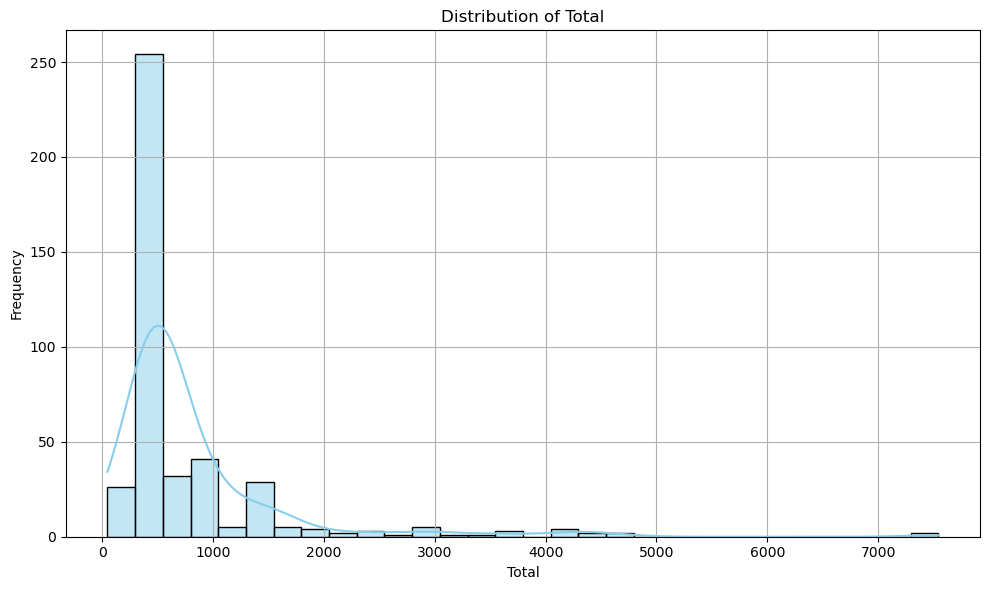

   total total_category
0    485        100-500
1    505       500-1000
2    469        100-500
3   1021      1000-2000
4   1039      1000-2000


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 画出 total 列的分布
plt.figure(figsize=(10, 6))
sns.histplot(df_combined["total"], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Total')
plt.xlabel('Total')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()
# 定义类别边界
bins = [-float('inf'), 100, 500, 1000, 2000, 5000, float('inf')]
labels = ['<100', '100-500', '500-1000', '1000-2000', '2000-5000', '>5000']

# 创建新列 'total_category' 表示类别
df_combined['total_category'] = pd.cut(df_combined['total'], bins=bins, labels=labels)

# 打印结果以确认
print(df_combined[['total', 'total_category']].head())

In [16]:
df_combined.to_csv("data_combined.csv")

In [95]:
# 读取数据
df = pd.read_csv("/Users/wenqing_liu/Desktop/第三学期/Regression method/data.csv")
n = len(df)

# 预处理数据
df1 = df.drop(df.columns[[1, 3]], axis=1)
df2 = df.drop(df.columns[[0, 2]], axis=1)
df2.iloc[:, 0] = df2.iloc[:, 1] - df2.iloc[:, 0]

new_columns = ["y", "m", "person", "coin", "group"]
df1.columns = df2.columns = new_columns

# 合并数据
df_combined = pd.concat([df1, df2], ignore_index=True)
df_combined['person'] = pd.Categorical(df_combined['person'])
df_combined['coin'] = pd.Categorical(df_combined['coin'])
df_combined['group'] = pd.Categorical(df_combined['group'])
df_combined["total"] = df_combined["m"]

# 创建新列 'total_category' 表示类别
bins = [-float('inf'), 100, 500, 1000, 2000, 5000, float('inf')]
labels = ['<100', '100-500', '500-1000', '1000-2000', '2000-5000', '>5000']
df_combined['total_category'] = pd.cut(df_combined['total'], bins=bins, labels=labels)

# 按 person 分组并拟合模型
results = {}
for person, group_data in df_combined.groupby('person'):
    # 准备 y 和 X
    y = np.column_stack([group_data['y'], group_data['m'] - group_data['y']]).astype(float)
    X = sm.add_constant(pd.get_dummies(group_data['coin'], drop_first=False).astype(float))
    
    # 拟合模型
    model = sm.GLM(y, X, family=sm.families.Binomial())
    results[person] = model.fit()

# 打印每个模型的摘要
for person, result in results.items():
    print(f"\n{person} 的模型摘要:")
    print(result.summary())

/var/folders/81/r3mn1cj132134tmfyygd33zr0000gn/T/ipykernel_11546/2552849052.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for person, group_data in df_combined.groupby('person'):
/Users/wenqing_liu/ENTER/envs/pymc_env/lib/python3.12/site-packages/statsmodels/tsa/tsatools.py:162: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  x = pd.concat(x[::order], axis=1)
/Users/wenqing_liu/ENTER/envs/pymc_env/lib/python3.12/site-packages/statsmodels/tsa/tsatools.py:162: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no l


AaronLob 的模型摘要:
                 Generalized Linear Model Regression Results                  
Dep. Variable:           ['y1', 'y2']   No. Observations:                   10
Model:                            GLM   Df Residuals:                        5
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -35.342
Date:                Wed, 01 Jan 2025   Deviance:                       1.9348
Time:                        23:14:54   Pearson chi2:                     1.93
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04294
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0523      0.

In [131]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# 读取数据
df = pd.read_csv("/Users/wenqing_liu/Desktop/第三学期/Regression method/data.csv")

# 数据预处理
n = len(df)
df1 = df.drop(df.columns[[1, 3]], axis=1)
df2 = df.drop(df.columns[[0, 2]], axis=1)
df2.iloc[:, 0] = df2.iloc[:, 1] - df2.iloc[:, 0]

new_columns = ["y", "m", "person", "coin", "group"]
df1.columns = df2.columns = new_columns

df_combined = pd.concat([df1, df2], ignore_index=True)

import statsmodels.api as sm
import pandas as pd
import numpy as np

import statsmodels.api as sm
import pandas as pd
import numpy as np

def run_glm_for_person(df_combined, person_name):
    # 提取指定 person's 数据
    person_data = df_combined[df_combined['person'] == person_name].copy()

    # 将 'person', 'coin', 'group' 转换为分类类型
    person_data['person'] = pd.Categorical(person_data['person'])
    person_data['coin'] = pd.Categorical(person_data['coin'])
    person_data['group'] = pd.Categorical(person_data['group'])

    # 添加 total 列
    person_data["total"] = person_data["m"]

    # 准备目标变量 y 和自变量 X
    y = np.column_stack([person_data['y'], person_data['m'] - person_data['y']]).astype(float)

    # 将 coin 列转换为虚拟变量，并添加常数项
    X_coin = sm.add_constant(pd.get_dummies(person_data['coin'], drop_first=False).astype(float))

    # 拟合 GLM 模型
    model_coin = sm.GLM(y, X_coin, family=sm.families.Binomial())
    results_coin = model_coin.fit()

    # 获取回归系数和 p-values
    summary = results_coin.summary2().tables[1]  # 获取回归系数和相关统计信息
    significant_vars = summary[summary['P>|z|'] < 0.05]  # 选择 p-value 小于 0.05 的变量

    # 打印显著变量
    if not significant_vars.empty:
        print(f"Significant variables for {person_name}:")
        print(significant_vars)
    else:
        print(f"No significant variables for {person_name}.")

    print("\n" + "="*50 + "\n")

# 假设 df_combined 是已经加载并准备好的数据框
# 获取所有唯一的 person 名称
person_names = df_combined['person'].unique()

# 遍历所有 person，并为每个人运行 GLM 模型
for person_name in person_names:
    run_glm_for_person(df_combined, person_name)


No significant variables for frantisekB.


No significant variables for ingeborgR.


Significant variables for alexandraS:
          Coef.  Std.Err.         z     P>|z|    [0.025    0.975]
const  0.045990  0.017858  2.575332  0.010014  0.010989  0.080991
1MXN   0.091766  0.026259  3.494623  0.000475  0.040299  0.143232


Significant variables for madlenH:
            Coef.  Std.Err.         z     P>|z|    [0.025    0.975]
0.50EUR  0.087969  0.023762  3.702087  0.000214  0.041396  0.134541


Significant variables for henrikG:
         Coef.  Std.Err.         z     P>|z|    [0.025    0.975]
2EUR  0.059041  0.025834  2.285407  0.022289  0.008407  0.109674


Significant variables for adamF:
            Coef.  Std.Err.         z     P>|z|    [0.025    0.975]
const    0.086982  0.022540  3.859034  0.000114  0.042805  0.131159
0.05EUR  0.107044  0.043011  2.488773  0.012818  0.022745  0.191344


No significant variables for jillR.


No significant variables for jonasP.


No significant variab

/Users/wenqing_liu/ENTER/envs/pymc_env/lib/python3.12/site-packages/statsmodels/tsa/tsatools.py:162: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  x = pd.concat(x[::order], axis=1)
/Users/wenqing_liu/ENTER/envs/pymc_env/lib/python3.12/site-packages/statsmodels/tsa/tsatools.py:162: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  x = pd.concat(x[::order], axis=1)
/Users/wenqing_liu/ENTER/envs/pymc_env/lib/python3.12/site-packages/statsmodels/tsa/tsatools.py:162: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future 

/var/folders/81/r3mn1cj132134tmfyygd33zr0000gn/T/ipykernel_11546/454143227.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  coin_counts = df_combined.groupby('person')['coin'].nunique().reset_index()
/var/folders/81/r3mn1cj132134tmfyygd33zr0000gn/T/ipykernel_11546/454143227.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='person', y='num_coins', data=coin_counts, palette='viridis')


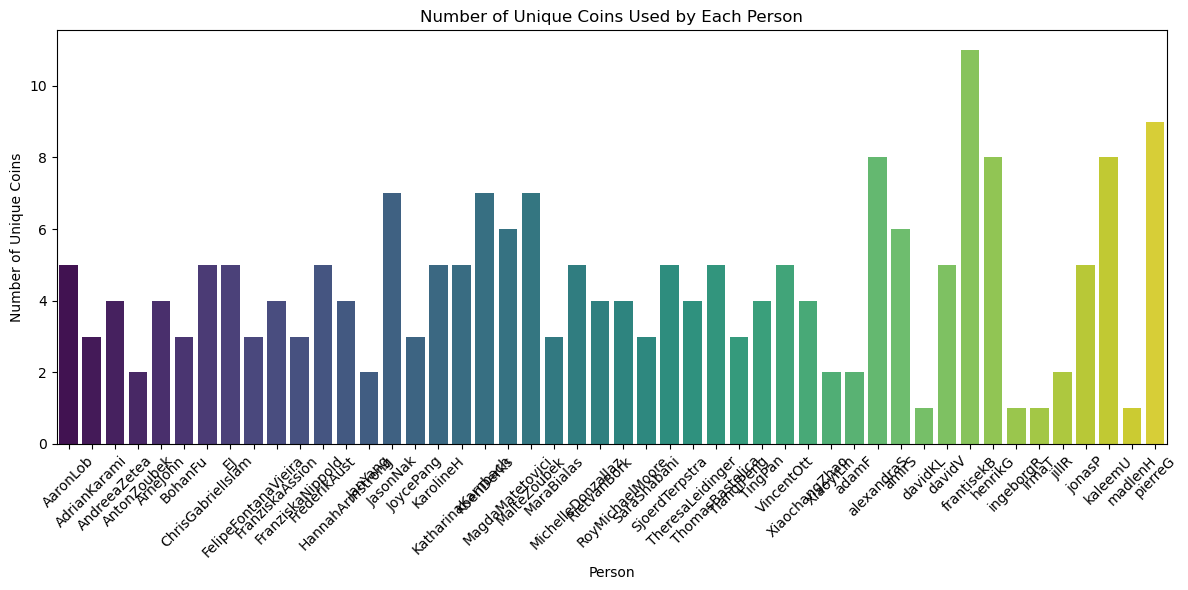

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# 统计每个人使用的硬币数量
coin_counts = df_combined.groupby('person')['coin'].nunique().reset_index()
coin_counts.columns = ['person', 'num_coins']

# 可视化每个人使用的硬币数量
plt.figure(figsize=(12, 6))
sns.barplot(x='person', y='num_coins', data=coin_counts, palette='viridis')
plt.title('Number of Unique Coins Used by Each Person')
plt.xlabel('Person')
plt.ylabel('Number of Unique Coins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [231]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# 设置随机种子，以确保可重复性
np.random.seed(42)

# 设置不同的 m 值
m_values = [10, 50, 100, 500,1000,2000,3000]
n = 100  # 每个 m 值生成 1000 个样本

combined_data = pd.DataFrame(columns=['y', 'm'])

for m in m_values:
    y = np.random.binomial(m, 0.5, n)
    
    temp_df = pd.DataFrame({'y': y, 'm': m})
    combined_data = pd.concat([combined_data, temp_df], ignore_index=True)

combined_data['y'] = combined_data['y'].astype(float)
combined_data['m'] = combined_data['m'].astype(float)

weights =  1/(4 * combined_data['m'])

# 仅包含常数项
X_with_const = sm.add_constant(np.ones(len(combined_data)))

# 使用 WLS 拟合回归模型
model = sm.WLS(combined_data['y']/combined_data['m'], X_with_const, weights=weights)
results = model.fit()

# 打印回归结果
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            WLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 02 Jan 2025   Prob (F-statistic):                nan
Time:                        00:17:04   Log-Likelihood:                -215.28
No. Observations:                 700   AIC:                             432.6
Df Residuals:                     699   BIC:                             437.1
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4860      0.005     91.014      0.0

In [11]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Gamma
import matplotlib.pyplot as plt

# 构建数据
data = {
    'Chimpanzee': ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
                    '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
                    '3', '3', '3', '3', '3', '3', '3', '3', '3', '3',
                    '4', '4', '4', '4', '4', '4', '4', '4', '4', '4'],
    'Word': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
             '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
             '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
             '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'],
    'Time': [178, 60, 177, 36, 225, 345, 40, 2, 287, 14,    # Chimpanzee 1
             78, 14, 80, 15, 10, 115, 10, 12, 129, 80,      # Chimpanzee 2 (修正了8号单词的时间从126改为12)
             99, 18, 20, 25, 15, 54, 25, 10, 476, 55,       # Chimpanzee 3
             297, 20, 195, 18, 24, 420, 40, 15, 372, 190]   # Chimpanzee 4
}

df = pd.DataFrame(data)
X = sm.add_constant(np.ones(len(df)))  # 只添加常数项
y = df['Time']

# 使用伽马分布拟合GLM模型
model = GLM(y, X, family=Gamma(link=sm.families.links.log()))
result = model.fit()

# 打印模型摘要
print("模型只包含常数项的结果：")
print(result.summary())



模型只包含常数项的结果：
                 Generalized Linear Model Regression Results                  
Dep. Variable:                   Time   No. Observations:                   40
Model:                            GLM   Df Residuals:                       39
Model Family:                   Gamma   Df Model:                            0
Link Function:                    log   Scale:                          1.4121
Method:                          IRLS   Log-Likelihood:                -226.38
Date:                Fri, 03 Jan 2025   Deviance:                       60.378
Time:                        19:48:53   Pearson chi2:                     55.1
No. Iterations:                     7   Pseudo R-squ. (CS):              0.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6763      0.188     24

/Users/wenqing_liu/ENTER/envs/pymc_env/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [1]:
import scipy.stats as stats

# 计算临界F值
alpha = 0.05  # 通常选择显著性水平为0.05
dfn = 3  # 自由度1
dfd = 27  # 自由度2
F_critical = stats.f.ppf(1 - alpha, dfn, dfd)

# 计算p值
F_observed = 4.78  # 观察到的F值
p_value = 1 - stats.f.cdf(F_observed, dfn, dfd)

print(f"临界F值: {F_critical:.4f}")
print(f"p值: {p_value:.4f}")


临界F值: 2.9604
p值: 0.0085
